In [1]:
pip install biopython

In [2]:
from Bio import Entrez
import time

def fetch_abstracts(query, email, api_key, max_results=100):
    Entrez.email = email  # Set your email here
    Entrez.api_key = api_key  # Set your API key here

    # Search for articles
    search_handle = Entrez.esearch(db="pubmed", term=query, retmax=max_results)
    search_results = Entrez.read(search_handle)
    search_handle.close()

    id_list = search_results["IdList"]
    abstracts = {}

    # Fetch abstracts
    for pmid in id_list:
        fetch_handle = Entrez.efetch(db="pubmed", id=pmid, rettype="abstract", retmode="text")
        abstract = fetch_handle.read().strip()
        fetch_handle.close()
        abstracts[pmid] = abstract

        # Respectful delay to avoid overloading the server
        time.sleep(0.5)

    return abstracts

# Example usage
query = "Amyotrophic Lateral Sclerosis"  # Replace with your specific query
email = "manishamuthuluru177@gmail.com"  # Replace with your email
api_key = "10d78ee9c6500083539ff5140318f6b84408"  # Replace with your API key
abstracts = fetch_abstracts(query, email, api_key)

# Displaying the results
for pmid, abstract in abstracts.items():
    print(f"PMID: {pmid}\nAbstract: {abstract}\n")


PMID: 38059522
Abstract: 1. J Magn Reson Imaging. 2023 Dec 7. doi: 10.1002/jmri.29171. Online ahead of 
print.

Assessment of Cerebral White Matter Involvement in Amyotrophic Lateral Sclerosis 
Patients With Disease Progression and Cognitive Impairment by Fixel-Based 
Analysis and Neurite Orientation Dispersion and Density Imaging.

Xu R(1), Wang X(1), Zhu S(2), Jiang B(1), Wan J(1), Ma J(1), Yu Y(1), Yu L(2), 
Fang Q(2), Hu C(1), Zhu M(1).

Author information:
(1)Department of Radiology, The First Affiliated Hospital of Soochow University, 
Suzhou, China.
(2)Department of Neurology, The First Affiliated Hospital of Soochow University, 
Suzhou, China.

BACKGROUND: Previous studies using emerging diffusion MRI techniques have 
revealed damage to the white matter (WM) microstructure in amyotrophic lateral 
sclerosis (ALS), particularly the influence of crossed fibers, but there is a 
lack of subgroup analyses.
PURPOSE: To detect WM microstructural changes in ALS patients using fixel-base

In [2]:
from Bio import Entrez
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

def fetch_abstract(pmid):
    Entrez.email = "manishamuthuluru177@gmail.com"  # Replace with your email
    handle = Entrez.efetch(db="pubmed", id=pmid, rettype="abstract", retmode="text")
    abstract = handle.read()
    handle.close()
    return abstract

def extract_entities(text):
    words = word_tokenize(text)
    words_pos_tagged = pos_tag(words)
    return ne_chunk(words_pos_tagged)

# Example PMID
pmid = ['38059522', '38057503', '38056310', '38056214', '38053196', '38052682', '38052485', '38051886', '38051885', '38051870', '38050862', '38050178', '38050140', '38050066', '38049694', '38049549', '38045991', '38043051', '38042502', '38041684', '38041679', '38041659', '38039182', '38038225', '38037913', '38036035', '38035964', '38033869', '38033614', '38031465', '38030693', '38030509', '38029395', '38028604', '38026702', '38026695', '38025370', '38025276', '38022694', '38022487', '38022476', '38022431', '38022117', '38021968', '38020614', '38020597', '38020546', '38019651', '38019415', '38019311', '38018200', '38018119', '38015828', '38014926', '38014869', '38014622', '38014237', '38014203', '38014069', '38013452', '38013317', '38010626', '38010108', '38008627', '38007795', '38006254', '38005489', '38005288', '38003404', '38003309', '38002982', '38002967', '38002924', '38002659', '38002490', '38002405', '38002264', '38001994', '38001967', '38001926', '38001861', '38001860', '38001563', '38001557', '38001260', '37999738', '37999510', '37997256', '37996528', '37995198', '37993492', '37993052', '37992921', '37992159', '37988788', '37988653', '37986827', '37986813', '37986728', '37983967']
abstract = fetch_abstract(pmid)
entities = extract_entities(abstract)

print(entities)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  1/CD
  ./.
  J/NNP
  (PERSON Magn/NNP Reson/NNP Imaging/NNP)
  ./.
  2023/CD
  Dec/NNP
  7./CD
  doi/NN
  :/:
  10.1002/jmri.29171/CD
  ./.
  (PERSON Online/NNP)
  ahead/RB
  of/IN
  print/NN
  ./.
  Assessment/NN
  of/IN
  (ORGANIZATION Cerebral/NNP)
  (FACILITY White/NNP Matter/NNP)
  Involvement/NNP
  in/IN
  (GPE Amyotrophic/NNP)
  Lateral/NNP
  Sclerosis/NNP
  Patients/NNPS
  With/IN
  (PERSON Disease/NNP Progression/NNP)
  and/CC
  (PERSON Cognitive/NNP Impairment/NNP)
  by/IN
  Fixel-Based/JJ
  Analysis/NN
  and/CC
  (ORGANIZATION Neurite/NNP Orientation/NNP Dispersion/NNP)
  and/CC
  (PERSON Density/NNP Imaging/NNP)
  ./.
  Xu/NNP
  R/NNP
  (/(
  1/CD
  )/)
  ,/,
  (PERSON Wang/NNP X/NNP)
  (/(
  1/CD
  )/)
  ,/,
  (PERSON Zhu/NNP S/NNP)
  (/(
  2/CD
  )/)
  ,/,
  (PERSON Jiang/NNP B/NNP)
  (/(
  1/CD
  )/)
  ,/,
  (PERSON Wan/NNP J/NNP)
  (/(
  1/CD
  )/)
  ,/,
  (PERSON Ma/NNP J/NNP)
  (/(
  1/CD
  )/)
  ,/,
  (PERSON Yu/NNP Y/NNP)
  (/(
  1/CD
  )/)
  ,/,
  (PERSON Yu/N

In [3]:
def read_nltk_output(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

nltk_output = read_nltk_output(r"C:/Users/manis/anaconda3/envs/myenv/nltk_output.txt")

In [4]:
import re

# Function to split text into sentences for easier review
def split_into_sentences(text):
    sentences = re.split(r'(?<=[.!?]) +', text)
    return sentences

sentences = split_into_sentences(nltk_output)

# Display sentences for manual review
for i, sentence in enumerate(sentences):
    print(f"Sentence {i+1}: {sentence}")

Sentence 1: (S
  1/CD
  ./.
  J/NNP
  (PERSON Magn/NNP Reson/NNP Imaging/NNP)
  ./.
  2023/CD
  Dec/NNP
  7./CD
  doi/NN
  :/:
  10.1002/jmri.29171/CD
  ./.
  (PERSON Online/NNP)
  ahead/RB
  of/IN
  print/NN
  ./.
  Assessment/NN
  of/IN
  (ORGANIZATION Cerebral/NNP)
  (FACILITY White/NNP Matter/NNP)
  Involvement/NNP
  in/IN
  (GPE Amyotrophic/NNP)
  Lateral/NNP
  Sclerosis/NNP
  Patients/NNPS
  With/IN
  (PERSON Disease/NNP Progression/NNP)
  and/CC
  (PERSON Cognitive/NNP Impairment/NNP)
  by/IN
  Fixel-Based/JJ
  Analysis/NN
  and/CC
  (ORGANIZATION Neurite/NNP Orientation/NNP Dispersion/NNP)
  and/CC
  (PERSON Density/NNP Imaging/NNP)
  ./.
  Xu/NNP
  R/NNP
  (/(
  1/CD
  )/)
  ,/,
  (PERSON Wang/NNP X/NNP)
  (/(
  1/CD
  )/)
  ,/,
  (PERSON Zhu/NNP S/NNP)
  (/(
  2/CD
  )/)
  ,/,
  (PERSON Jiang/NNP B/NNP)
  (/(
  1/CD
  )/)
  ,/,
  (PERSON Wan/NNP J/NNP)
  (/(
  1/CD
  )/)
  ,/,
  (PERSON Ma/NNP J/NNP)
  (/(
  1/CD
  )/)
  ,/,
  (PERSON Yu/NNP Y/NNP)
  (/(
  1/CD
  )/)
  ,/,
  

In [5]:
# Initialize a dictionary to hold categorized entities
categorized_entities = {
    "Disease": [],
    "Drug": [],
    "Gene": [],
    # Add more categories as needed
}

# Example of adding entries (this would be done based on your manual review)
categorized_entities["Disease"].append("Amyotrophic Lateral Sclerosis")
categorized_entities["Drug"].append("riluzole")
categorized_entities["Gene"].append("SOD1")

In [3]:
import spacy

# Load the scispaCy model
nlp = spacy.load("en_core_sci_sm")

# Function to read text file
def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Function to extract entities using scispaCy
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Path to your text file
file_path = 'C:/Users/manis/anaconda3/envs/myenv/Outputs/nltk_output.txt'

# Read the text file
text = read_text_file(file_path)

# Extract entities
entities = extract_entities(text)

# Print or process the extracted entities
print(entities)


[('S\n  1/CD\n  ./.\n  J/NNP\n  ', 'ENTITY'), ('PERSON Magn/NNP Reson/NNP Imaging/NNP', 'ENTITY'), ('PERSON Online/NNP', 'ENTITY'), ('GPE Amyotrophic/NNP', 'ENTITY'), ('and/CC\n  ', 'ENTITY'), ('PERSON Cognitive/NNP Impairment/NNP)\n  by/IN\n  Fixel-Based/JJ\n  Analysis/NN', 'ENTITY'), ('and/CC\n  ', 'ENTITY'), ('and/CC\n  ', 'ENTITY'), ('PERSON', 'ENTITY'), ('PERSON', 'ENTITY'), ('PERSON Jiang/NNP B/NNP', 'ENTITY'), ('PERSON', 'ENTITY'), ('PERSON Ma/NNP', 'ENTITY'), ('PERSON', 'ENTITY'), ('PERSON', 'ENTITY'), ('information/NN', 'ENTITY'), (')\n  Department/NNP\n  of/IN\n  ', 'ENTITY'), (',\n  The/DT\n  ', 'ENTITY'), (',\n  (GPE Suzhou/NNP', 'ENTITY'), (',\n  (GPE China/NNP)\n  ./.\n  ', 'ENTITY'), (')\n  Department/NNP\n  of/IN\n  ', 'ENTITY'), (',\n  The/DT\n  ', 'ENTITY'), (',\n  (GPE Suzhou/NNP', 'ENTITY'), (',\n  (GPE China/NNP)\n  ./.\n  BACKGROUND/NNP\n  :/:\n  Previous/JJ', 'ENTITY'), ('studies/NNS', 'ENTITY'), ('using/VBG', 'ENTITY'), ('techniques/NNS\n  have/VBP\n  revealed/V

In [16]:
def preprocess_text(text):
    # Replace newline characters with space
    text = text.replace('\n', ' ')
    # Remove extra whitespaces
    text = ' '.join(text.split())
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers (if necessary)
    text = re.sub(r'\d+', '', text)
    # Additional domain-specific processing can be added here

    return text


In [19]:
import re

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers (if necessary)
    text = re.sub(r'\d+', '', text)
    return text

raw_text = "Your raw text here\nWith new lines, and SPECIAL characters!"
clean_text = preprocess_text(raw_text)


In [15]:
def custom_post_processing(entities):
    filtered_entities = []
    for ent in entities:
        if ent[1] in {"Gene", "Symptom", "Diagnostic Test", "Treatment", "Related Condition"}:  # Keep only certain types of entities
            filtered_entities.append(ent)
    return filtered_entities

# Assuming entities is your list of extracted entities
refined_entities = custom_post_processing(entities)
print(refined_entities)

[]


In [10]:
# Define a sample list of entities as a list of tuples
entities = [
    ("SOD1", "Gene"),
    ("Muscle weakness", "Symptom"),
    ("Electromyography", "Diagnostic Test"),
    ("Riluzole", "Treatment"),
    ("Frontotemporal dementia", "Related Condition")
]

def custom_post_processing(entities):
    filtered_entities = []
    for ent, label in entities:
        if label in {"Gene", "Symptom", "Diagnostic Test", "Treatment", "Related Condition"}:
            filtered_entities.append((ent, label))
    return filtered_entities

# Call the function with the defined entities
refined_entities = custom_post_processing(entities)
print(refined_entities)


[('SOD1', 'Gene'), ('Muscle weakness', 'Symptom'), ('Electromyography', 'Diagnostic Test'), ('Riluzole', 'Treatment'), ('Frontotemporal dementia', 'Related Condition')]


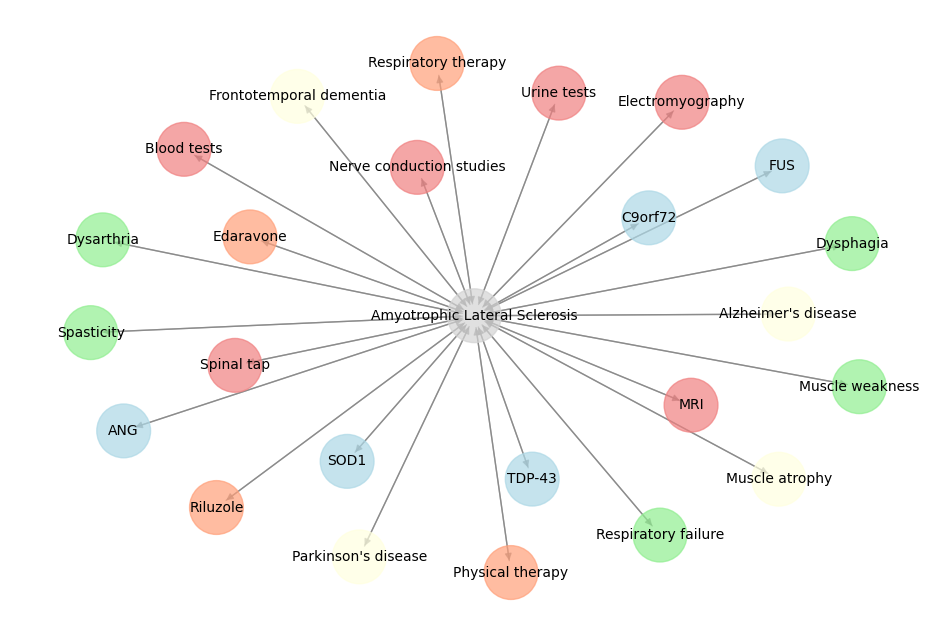

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the entities and their types
entities = {
    "Genes": ["SOD1", "C9orf72", "TDP-43", "FUS", "ANG"],
    "Symptoms": ["Muscle weakness", "Spasticity", "Dysarthria", "Dysphagia", "Respiratory failure"],
    "Diagnostic Tests": ["Electromyography", "Nerve conduction studies", "MRI", "Blood tests", "Urine tests", "Spinal tap"],
    "Treatments and Therapies": ["Riluzole", "Edaravone", "Physical therapy", "Respiratory therapy"],
    "Related Conditions and Comorbidities": ["Frontotemporal dementia", "Parkinson's disease", "Alzheimer's disease", "Muscle atrophy"]
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes (entities) with their types
for entity_type, entity_list in entities.items():
    for entity in entity_list:
        G.add_node(entity, type=entity_type)

# Adding the central node 'Amyotrophic Lateral Sclerosis'
G.add_node("Amyotrophic Lateral Sclerosis", type="Disease")

# Define edges (connections) between entities and 'Amyotrophic Lateral Sclerosis'
edges = []
for entity in G.nodes:
    if entity != "Amyotrophic Lateral Sclerosis":
        edges.append(("Amyotrophic Lateral Sclerosis", entity))
        edges.append((entity, "Amyotrophic Lateral Sclerosis"))

# Add edges to the graph
for edge in edges:
    G.add_edge(edge[0], edge[1])

# Define node colors based on entity type
node_colors = {
    'Genes': 'lightblue', 
    'Symptoms': 'lightgreen', 
    'Diagnostic Tests': 'lightcoral', 
    'Treatments and Therapies': 'lightsalmon', 
    'Related Conditions and Comorbidities': 'lightyellow', 
    'Disease': 'lightgrey'
}
node_types = [G.nodes[node]['type'] for node in G.nodes]

# Define the layout for the nodes (circular layout for clarity)
pos = nx.spring_layout(G)  # Changed to spring_layout for better visualization

# Define node colors based on entity type
colors = [node_colors[node_type] for node_type in node_types]

# Draw nodes and edges with improved labels
node_labels = {node: node for node in G.nodes}
edge_labels = {edge: '' for edge in G.edges}  # No need for edge labels in this case

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=1500, alpha=0.7)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.7)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='gray')

plt.axis('off')
plt.show()


In [1]:
import os
print(os.getcwd())

C:\Users\manis


In [ ]:
import shutil
shutil.copy('ALS_Sourcecode.ipynb', '/destination_notebook.ipynb')